# **H-PAY-P**
#### **Authors:** Mikołaj Motak, Sonia Pawluk, Jan Sierpina


## Separate category as data
The goal of this part of research was to check which columns can be well-predicted using only one category as data. The prediction was tested using Linear Regression. 

### Correlation seeking
Using several linear models we checked the mean cross-validation scores, given by predicting each column based on the data from each category.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


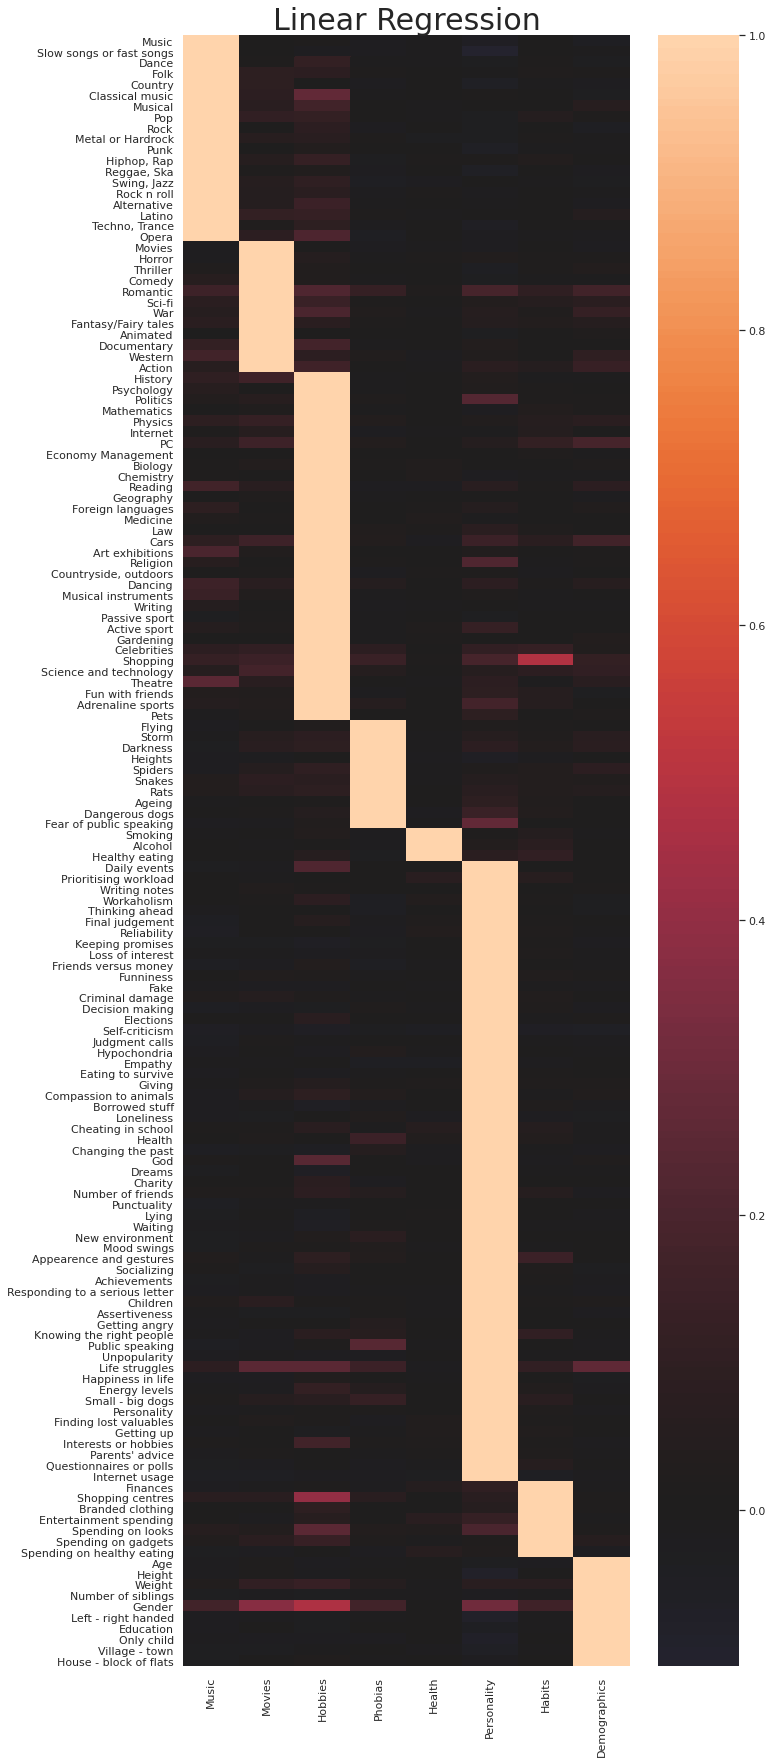

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


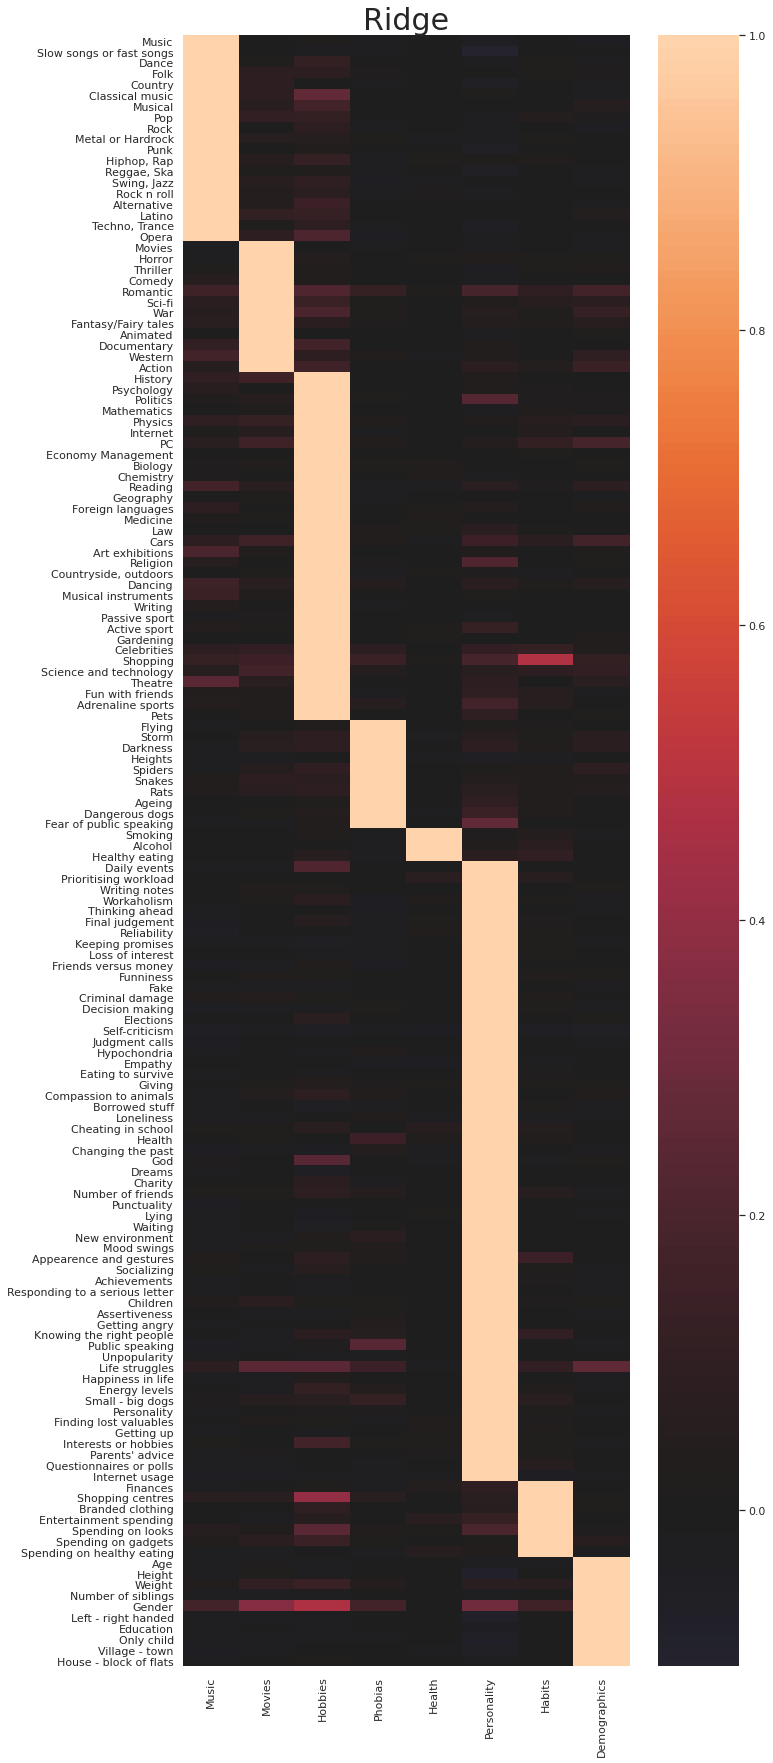

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


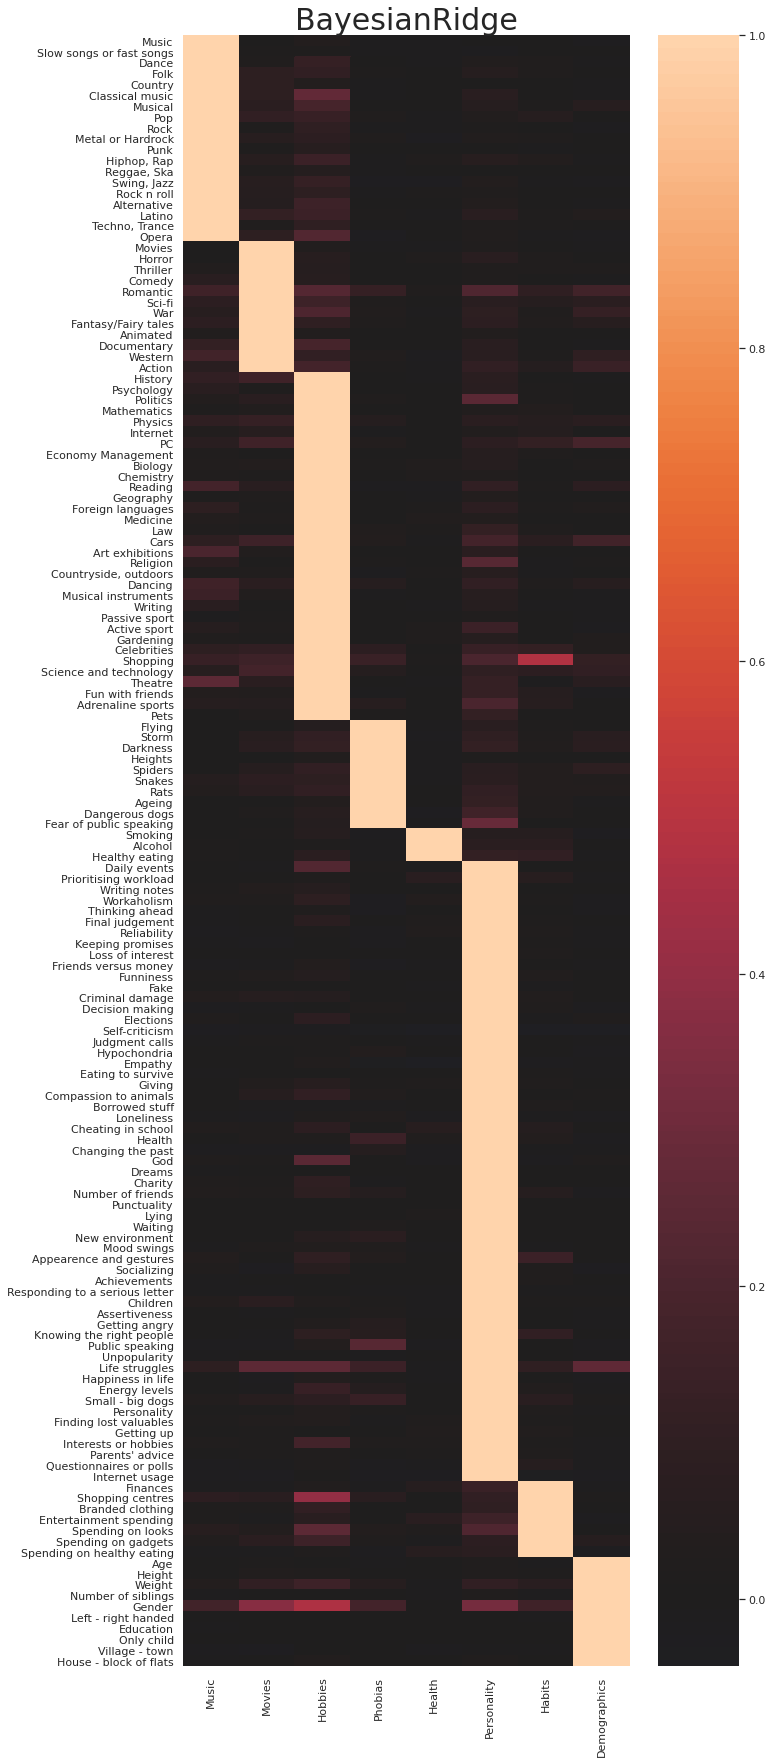

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


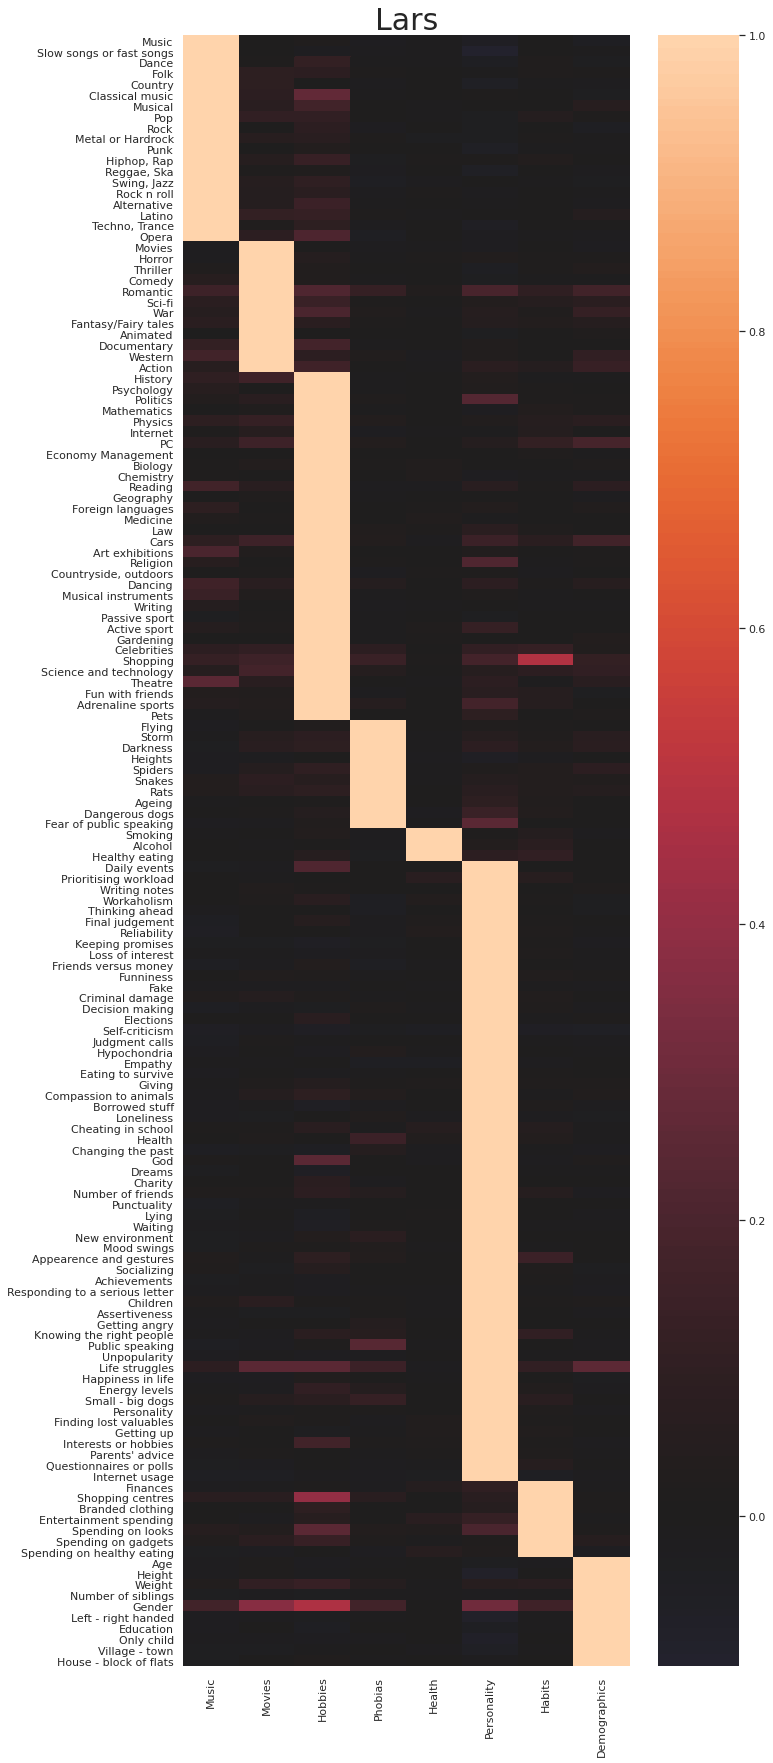

In [ ]:
#@title 
for model_name, model in models.items():
  mean_scores_matrix = np.vstack(
    (check_mean_linear_regression_score(df, cat_cols, df.columns, model) for cat_cols in categories.values())).T
  fig, ax = plt.subplots(figsize=(10,30))
  sns.heatmap(mean_scores_matrix, xticklabels=categories.keys(), yticklabels=df.columns, center=0, ax=ax)
  plt.title(model_name, fontsize=30)
  plt.show()

The lighter places in heatmap were the candidates for further inspection. After discarding some of the uninteresting research questions we decided to focus on 'Gender', 'God' and 'Life struggles'.

### Method
We decided to use Logistic Regression to predict the variables (it gave the best results). 
In the survey - 'Gender' was a binary variable from the beginning; 'God' and 'Life struggles' had to be made binary by setting them to $1$, if the value was above mean and to $0$, if the value was under or equal to the mean.

It was helpful to use preprocessing such as StandardScaler or OrdinalEncoder.

### Results

#### Which category is most gender specific?
As we've seen on a previous heatmap, in most of the cases, we can make a good guess about gender - basing it on most of the categories.

In [ ]:
#@title 
for cat_name, cat_cols in categories.items():
    data = df[cat_cols]
    std = StandardScaler()
    std.fit(data)
    data = std.transform(data)
    logistic_regression = LogisticRegression(C=0.3)
    scores = cross_val_score(logistic_regression, data, target, cv=6)
    print(cat_name, np.mean(scores))

Music 0.69103385930309
Movies 0.8009885413731568
Hobbies 0.854466046773739
Phobias 0.7000739644970414
Health 0.5980264393725933
Personality 0.7821628158166619
Habits 0.688092890015967


As we can see above - predicting the gender using the data from 'Hobbies' gave the score close to $0.85$. Categories such as 'Movies' and 'Personality' are not far behind, either. 

In general all scores are high, which gives the conclusion that gender differentiates people pretty well.

We can say that hobbies are most gender specific, as we can see it in the questions about interests like: celebrities, cars, personal computers and art.

#### Which category differentiates believers?
People were given a statement: 'I believe in God' and were asked to score it accordingly to how accurate the statement was for them on the scale 1-5. 

The mean score was $3.3$.

[Strongly Disagree 1-2-3-4-5 Strongly Agree]

In [ ]:
#@title 
for cat_name, cat_cols in categories.items():
    data = deepcopy(df[cat_cols])
    ss = StandardScaler()
    ss.fit(data)
    data = ss.transform(data)
    logistic_regression = LogisticRegression(C=0.01)
    scores = cross_val_score(logistic_regression, data, binary_target, cv=6)
    print(cat_name, np.mean(scores))

Music 0.5801810369118061
Movies 0.5812024513947591
Hobbies 0.7010190664036818
Phobias 0.5712994270686579
Health 0.5366828684136377
Personality 0.67227857612473
Habits 0.5703719357565512
Demografics 0.5831689677843523


Scores are not as high as they were when we were predicting the gender. However, they show us that we can be more certain while predicting someone's faith when we base our knowledge on their hobby. 

#### Which part of life makes young people cry more often?
Young people were asked to score a statement: 'I cry when I feel down or things don't go the right way' on the scale 1-5. 

The mean score was $3$.

[Strongly Disagree 1-2-3-4-5 Strongly Agree]

In [ ]:
#@title 
for cat_name, cat_cols in categories.items():
    data = deepcopy(df[cat_cols])
    ohe = OrdinalEncoder()
    ohe.fit(data)
    data = ohe.transform(data)
    logistic_regression = LogisticRegression(C=0.04)
    scores = cross_val_score(logistic_regression, data, binary_target, cv=6)
    print(cat_name, np.mean(scores))

Music 0.6455750446135061
Movies 0.7049462289846905
Hobbies 0.6960411383488306
Phobias 0.6535467737390814
Health 0.5910937353245046
Habits 0.6445595003287311
Demografics 0.6960411383488306


Hobbies had really good score this time as well, but the taste in movies turn out to be the best base for Logistic Regression. Maybe people that cry a lot should watch movies with other crybabies?

## What preferences/habits affect getting up early?

We used Random Forest Regressor to find the features that have the highest importance for getting up early.
Among the most important are punctuality and prioritising workload, but also surprisingly: people that tend to save money.

In [ ]:
#@title 
feature_inds = np.argsort(-rf.feature_importances_)
for feature, importance in zip(features[feature_inds][:6], rf.feature_importances_[feature_inds][:20]):
    print(f'Feature: {feature}, importance: {importance:.3f}')

Feature: Prioritising workload, importance: 0.252
Feature: Punctuality, importance: 0.240
Feature: Finances, importance: 0.123
Feature: Alcohol, importance: 0.046
Feature: Workaholism, importance: 0.041
Feature: Healthy eating, importance: 0.024


## Predicting arachnophobia

We have fitted Random Forest Regressor to predict the level of arachnophobia (phobia of spiders), knowing preferences. 

For the best model we achieved $1.449$ RMSE.

The plot below shows the results of Grid Search of best *number of estimators* and *max depth* parameters for XGBoost and Random Forests, on training and test-sets.

It is clear that XGBoost is much more prone to overfitting than Random Forest.

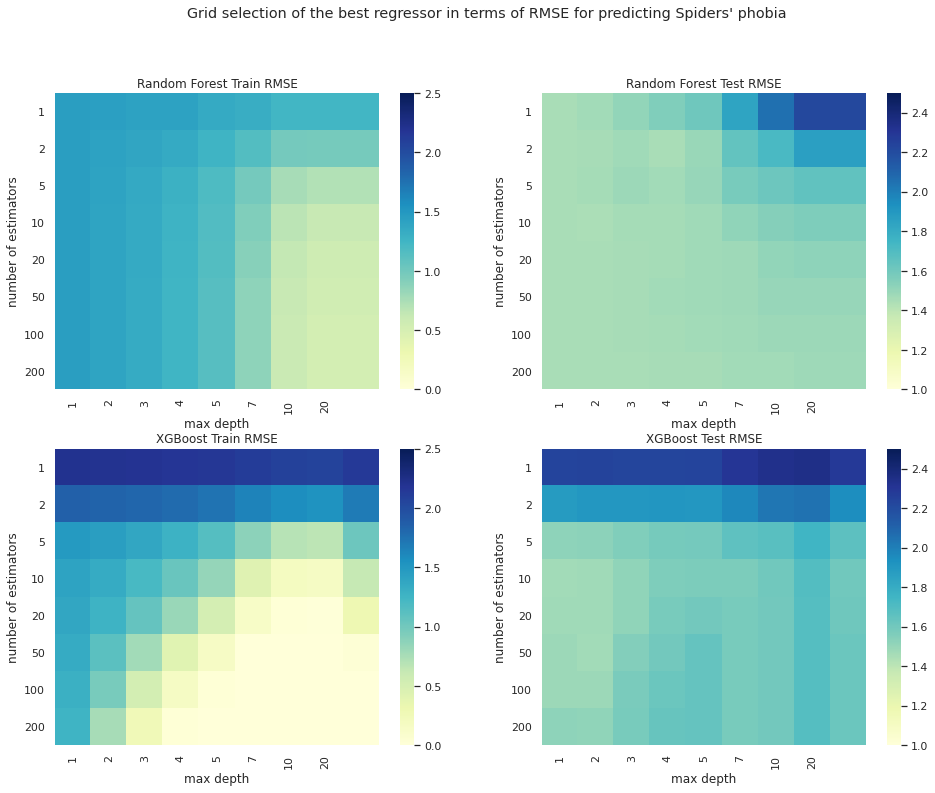

In [ ]:
#@title 
fig, ax = plt.subplots(2, 2)
sns.heatmap(rf_train_errors, xticklabels=depths, yticklabels=estimators, cmap="YlGnBu", ax=ax[0,0], vmin=0, vmax=2.5)
sns.heatmap(rf_test_errors, xticklabels=depths, yticklabels=estimators, cmap="YlGnBu", ax=ax[0,1], vmin=1, vmax=2.5)
sns.heatmap(xgb_train_errors, xticklabels=depths, yticklabels=estimators, cmap="YlGnBu", ax=ax[1,0], vmin=0, vmax=2.5)
sns.heatmap(xgb_test_errors, xticklabels=depths, yticklabels=estimators, cmap="YlGnBu", ax=ax[1,1], vmin=1, vmax=2.5)
ax[0,0].set_title('Random Forest Train RMSE');ax[0,1].set_title('Random Forest Test RMSE');ax[1,0].set_title('XGBoost Train RMSE');ax[1,1].set_title('XGBoost Test RMSE')
ax[0,0].set_ylabel('number of estimators');ax[0,1].set_ylabel('number of estimators');ax[1,0].set_ylabel('number of estimators');ax[1,1].set_ylabel('number of estimators')
ax[0,0].set_xlabel('max depth');ax[0,1].set_xlabel('max depth');ax[1,0].set_xlabel('max depth');ax[1,1].set_xlabel('max depth')
plt.suptitle('Grid selection of the best regressor in terms of RMSE for predicting Spiders\' phobia')
fig.set_size_inches(16,12)
plt.show()

##Are IT nerds less social, active or outgoing?

Basing it on hand-picked categories that usually would be linked with more social, active and 'outdoorsy' behaviour, mixing it with negated categories that could be linked with idea of introvertism and indoor 'nerdy' activities, we analysed the survey data - to find the answer to the stereotype about 'IT people' being 'basement-dwellers'. 

Data scores were compiled and transformed into percentages of total answers given by specific group. We also divided people into two new categories - based on their love and interest in IT, personal computers and computer science. We consider any person with average score $> 3$ - in those three categories as 'IT nerd' and any person with score $\leq 3$, as 'Other'

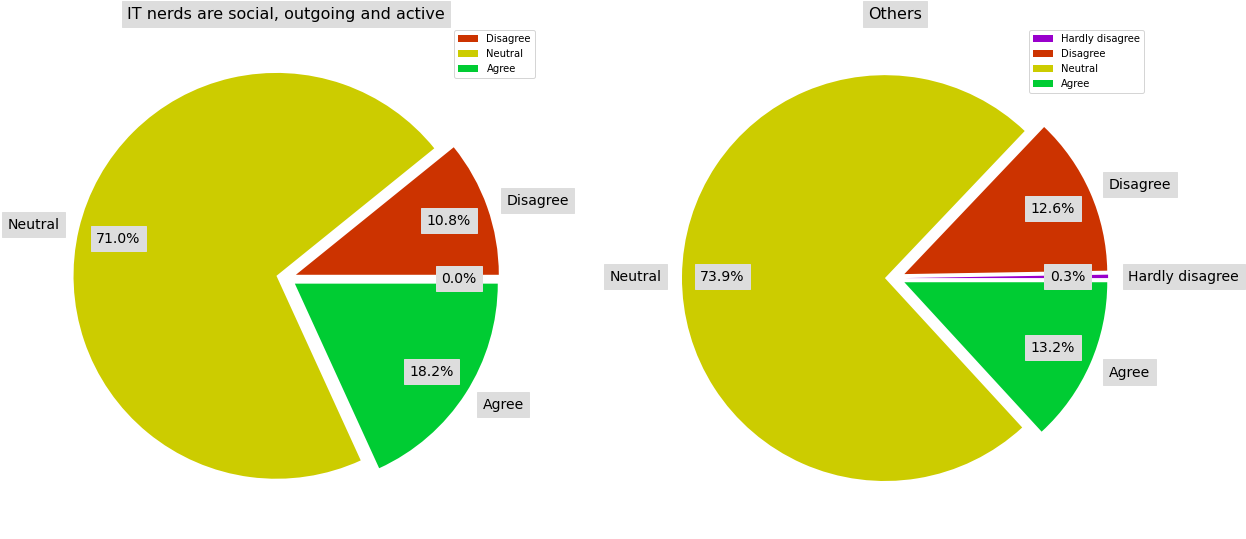

In [ ]:
#@title 
colors = ['#9900cc','#cc3300','#cccc00', '#00cc33','#0099cc']
explode = (0.05,0.05,0.05,0.05)
plot0, plot1 = pie_df.plot.pie(textprops={'backgroundcolor' : '#dddddd', 'fontsize': 14}, subplots=True, colors = colors, figsize=(20, 10), explode = explode, autopct='%1.1f%%', startangle=0, pctdistance=0.80)
plot0.set_title("IT nerds are social, outgoing and active", backgroundcolor = '#dddddd', fontsize = 16)
plot1.set_title("Others", backgroundcolor = '#dddddd', fontsize = 16)
plt.show()

As we can see the differences are minimal, but we still can say that (at least based on this data) most people are neutrally 'active'. Also IT nerds are actually more social and outgoing and less introverted than other groups on average.

Below we can also see the categories that were the most impactful for specific groups (selectKBest). Giving a little bit more insight on differences between specific groups of people - like Historians being into gardening.

In [ ]:
#@title 
for i in drop_cols:
    X_tab     = df2[i].drop(drop_cols, axis = 1)        # X = independent columns (potential predictors)
    y_tab     = df2[i][i]                               # y = target column (what we want to predict)
    fit_tab   = best_features.fit(X_tab,y_tab)
    df_scores = pd.DataFrame(fit_tab.scores_)
    feature_scores = pd.concat([pd.DataFrame(X_tab.columns), df_scores],axis=1)
    feature_scores.columns = ['Feature_Name', i]
    print(feature_scores.nlargest(17, i))
    print(" ")

                   Feature_Name        IT
0              Dislikes reading  5.980089
9                      Shopping  5.665048
4                       Dancing  3.933623
14              New environment  3.352080
8                   Celebrities  2.492697
16                     Children  2.279788
12         Friends versus money  2.188655
10                      Theatre  2.168680
1   Doesnt fear public speaking  1.573766
11             Fun with friends  1.076014
6                  Active sport  0.906018
13            Number of friends  0.893260
7                     Gardening  0.863166
15                  Socializing  0.680217
3         Countryside, outdoors  0.624566
5                 Passive sport  0.566522
2               Art exhibitions  0.563380
 
                   Feature_Name   History
7                     Gardening  4.280922
0              Dislikes reading  3.247008
6                  Active sport  2.496799
5                 Passive sport  2.300822
10                      Theatre 

##What types of people are more likely to drink alcohol?

Predicting based on person's interests and other traits, we created a Decision Tree that we can now use to analyse people's drinking habits.

As we can see below on both trees there is only small amount of people, who actually never drunk or who drink a lot (at least in the group of our respondents) - as most people mostly drink on special occasions and/or with friends. Interestingly the small factor of people who actually drink a lot - is mostly linked to the person's (lower) 'Entertainment Spending' and more importantly their younger 'Age'.

Which shows an important issue in modern societies - which is overly popular underage drinking. We can also notice that the same habits apply to people who spend more on their entertainment, who like dancing and classical music. And people who don't tend to save money are actually less likely to drink ever.

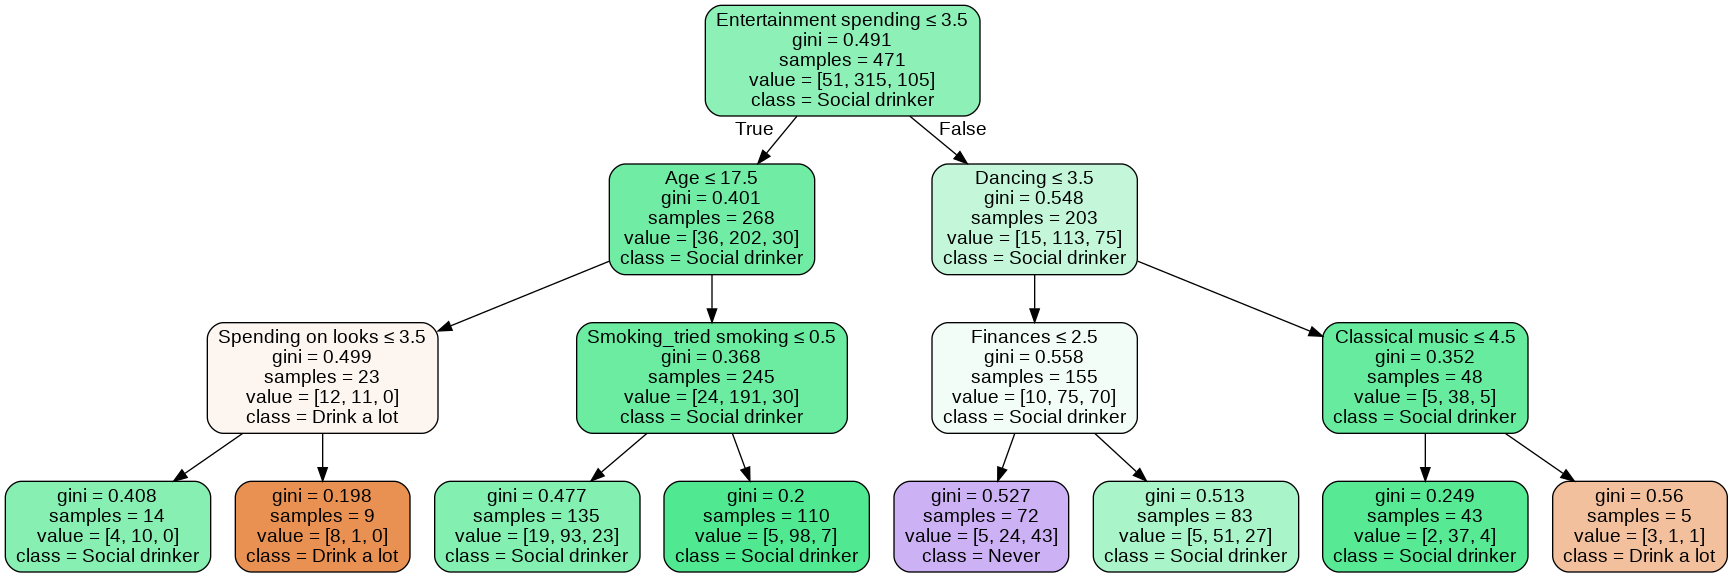

In [ ]:
#@title 
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
X_train, X_test, y_train, y_test = train_test_split(alcohol.drop('target',axis=1), alcohol['target'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

#developing a model
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

#visualizing the tree
import io
from io import StringIO
from sklearn.tree import export_graphviz

# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = alcohol.drop('target', axis=1)
feature_cols = xvar.columns

dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Drink a lot','Social drinker','Never'])

from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

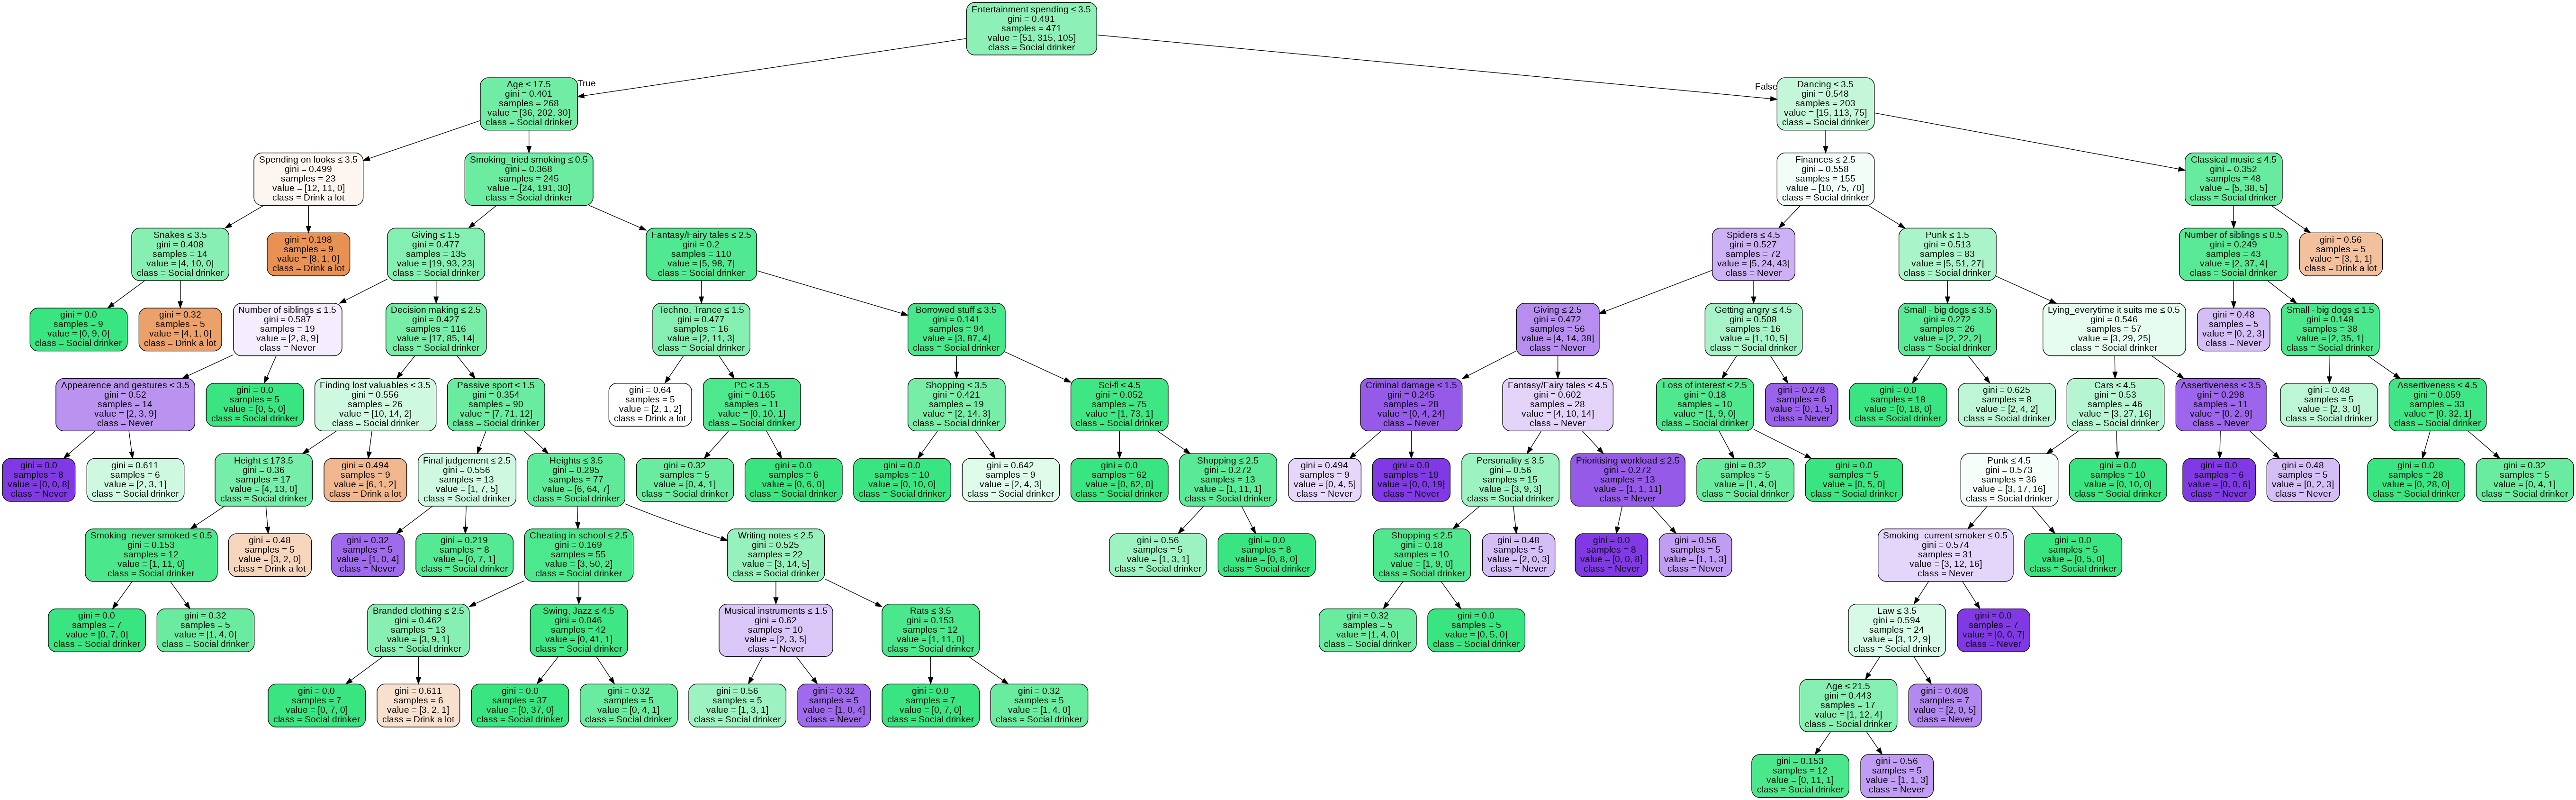

In [ ]:
#@title 
Image(graph.create_png())

# Unsuccessful Experiments

## KMeans clusters for hobbies and demographics
In notebook hobbies.ipynb we tried to assign to each person a cluster based on their demographics data and interests. We tried to see if they have anything in common, by plotting their correlation. 

The approach was unsuccessful and didn't give us any information about respondents.


## T-SNE on phobias

In notebook tsne.ipynb we tried applying TSNE to reduce dimensionality of phobias data. 

We were looking for some unusual patterns, but didn't find any.

## Decision Trees on drinking


Even if some data and information could be learned from Decision Trees - ultimately it was not worth the 'struggle' of implementing and using them. Especially on the dataset we used - Decision Trees were not the best choice to pick from.